In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = np.load('drive/MyDrive/MiniProject7/Numpydata92.npy',allow_pickle=True)
np.random.shuffle(data)

In [4]:
xdata = data[:,0]
ydata = data[:,1]

ydata = np.asarray(ydata, dtype=float)
ydata = ydata.reshape(len(ydata),1)

newxdata = np.array([])
for i in xdata:
  tmp = np.array(i, dtype=float)
  newxdata = np.append(newxdata, tmp[3000:-3000])
newxdata = newxdata.reshape(len(xdata), len(tmp[3000:-3000]))

xdata = newxdata
newxdata = None

test_samples = 10
xs = xdata[:-test_samples]
xt = xdata[-test_samples:]
ys = ydata[:-test_samples]
yt = ydata[-test_samples:]

In [5]:
[xs.shape, xt.shape]
[ys.shape, yt.shape]

[(82, 1), (10, 1)]

In [6]:
shp = xdata[18].shape
shp

(1999,)

In [7]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(4, input_shape = shp),
     tf.keras.layers.Dense(128),
     tf.keras.layers.Dense(64),
     tf.keras.layers.Dense(16),
     tf.keras.layers.Dense(1)
    ]
)
model.compile('adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8000      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 17,953
Trainable params: 17,953
Non-trainable params: 0
_________________________________________________________________


In [8]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') < 1e-4:
      print("Desired loss reached!...Stopping taining")
      self.model.stop_training = True

cb1 = mycallback()

In [9]:
model.fit(xs, ys, epochs=10000, callbacks=cb1)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 5ms/step - loss: 4.8034e-04
Epoch 291/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.2395e-04
Epoch 292/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.2824e-04
Epoch 293/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.1860e-04
Epoch 294/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9937e-04
Epoch 295/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.9982e-04
Epoch 296/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0183e-04
Epoch 297/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.6431e-04
Epoch 298/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.0778e-04
Epoch 299/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.4777e-04
Epoch 300/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.9476e-04
Epoch 301/10000
3/3

In [10]:
error = []
ye_arr = []
for indx in range(len(ys)):
  xtest = xs[indx].reshape(1,len(xt[1]))
  ytest = ys[indx]
  ye = model.predict(xtest)[0]
  ye_arr += [model.predict(xtest)[0][0]]
  # print(ytest, ye, ytest-ye, (1-ye/ytest)*100)
  error += [100*(ytest-ye)[0]]

In [11]:
errort = []
ye_arr2 = []
for indx in range(len(yt)):
  xtest = xt[indx].reshape(1,len(xt[1]))
  ytest = yt[indx]
  ye = model.predict(xtest)[0]
  ye_arr2 += [ model.predict(xtest)[0][0]]
  # print(ytest, ye, ytest-ye, (1-ye/ytest)*100)
  errort += [100*(ye-ytest)[0]]

In [12]:
error = np.abs(error)
errort = np.abs(errort)

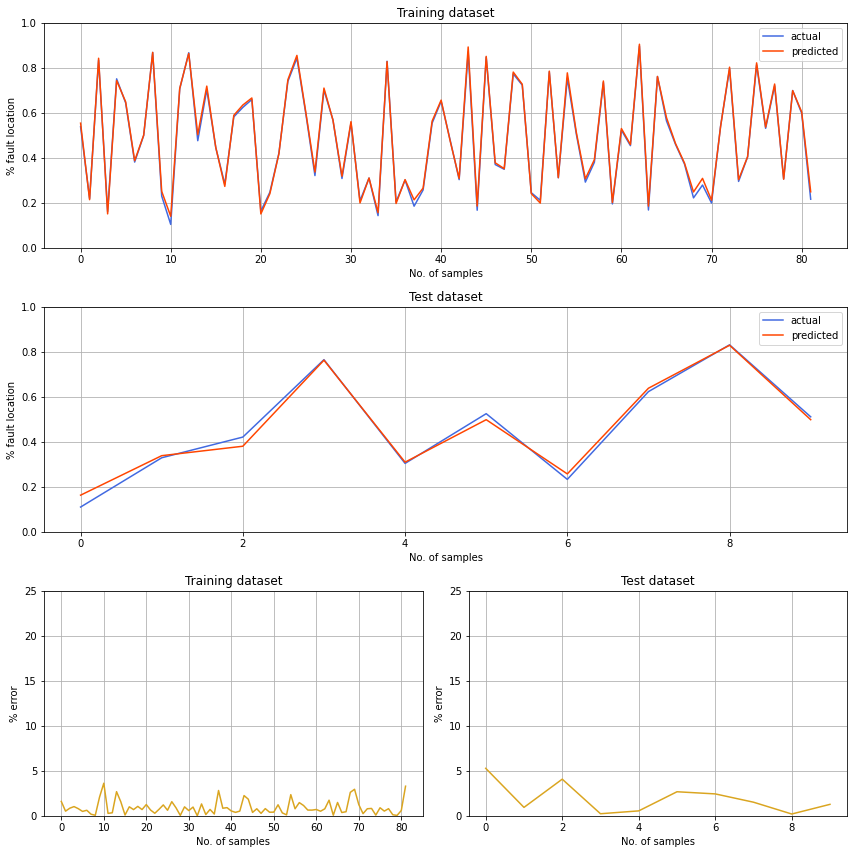

In [13]:
plt.figure(figsize=(12,12))

plt.subplot(311)
plt.plot(ys,'royalblue', label='actual')
plt.plot(ye_arr, 'orangered', label = 'predicted')
plt.title('Training dataset')
plt.xlabel('samples')
plt.ylabel('% fault location')
plt.ylim(0,1)
plt.legend()
plt.grid(1)

plt.subplot(312)
plt.plot(yt,'royalblue', label='actual')
plt.plot(ye_arr2, 'orangered', label = 'predicted')
plt.title('Test dataset')
plt.xlabel('samples')
plt.ylabel('% fault location')
plt.ylim(0,1)
plt.legend()
plt.grid(1)

plt.subplot(325)
plt.plot(error,'goldenrod')
plt.title('Training dataset')
plt.xlabel('samples')
plt.ylabel('% error')
plt.ylim(0,25)
plt.grid(1)

plt.subplot(326)
plt.plot(errort,'goldenrod')
plt.title('Test dataset')
plt.xlabel('samples')
plt.ylabel('% error')
plt.ylim(0,25)
plt.grid(1)

plt.tight_layout(pad=1.2)

In [14]:
#model.save('drive/MyDrive/MiniProject7/Models/Adam_input_reduced_split')